# Práctica: Fusión, Transformaciones, Feature Engineering y Clustering

Realización de la práctica asociada a los datos de la P3. Ha de realizarse un análisis completo y generar unos resultados de  agrupamiento y asociación.  

El objetivo de esta tarea es que el alumnado practique y aplique técnicas de procesamiento de datos, análisis exploratorio, clustering y minería de reglas de asociación. Se busca que integren conocimientos de fusión, limpieza, transformación y enriquecimiento de datos y que apliquen algoritmos de clustering y reglas de asociación para extraer patrones relevantes.

Instrucciones:

1. Carga y fusión de datos
Se proporcionan los conjuntos de datos que deben fusionar adecuadamente.

2. Preprocesamiento y limpieza de datos

* Detectar y tratar valores faltantes y outliers.
* Corregir errores de formato o inconsistencias.
* Normalizar o estandarizar variables si es necesario.

<div style="font-family: sans-serif; line-height: 1.5;">

  <div style="background-color: #2a66c2; color: white; padding: 5px 10px; font-weight: bold; margin-bottom: 1px;">
    3. Ingeniería de características y enriquecimiento
  </div>
  <div style="background-color: #2a66c2; color: white; padding: 5px 10px; margin-bottom: 10px;">
    <ul style="margin: 0; padding-left: 20px;">
      <li>Crear nuevas variables que puedan aportar información relevante al análisis.</li>
      <li>Transformar variables categóricas en numéricas o viceversa si se requiere para algoritmos de clustering y asociación.</li>
      <li>Realizar agregaciones o resúmenes de datos cuando sea útil.</li>
    </ul>
  </div>

  <div style="background-color: #2a66c2; color: white; padding: 5px 10px; font-weight: bold; margin-bottom: 1px;">
    4. Transformación y preparación para clustering
  </div>
  <div style="background-color: #2a66c2; color: white; padding: 5px 10px; margin-bottom: 10px;">
    <ul style="margin: 0; padding-left: 20px;">
      <li>Escalar variables según corresponda.</li>
      <li>Seleccionar las variables más relevantes para el análisis de agrupamiento.</li>
    </ul>
  </div>

  <div style="background-color: #2a66c2; color: white; padding: 5px 10px; font-weight: bold; margin-bottom: 1px;">
    5. Aplicación de algoritmos de clustering (minimo 2 como ejemplo se proponen Kmeans y DBSCAN)
  </div>
  <div style="background-color: #2a66c2; color: white; padding: 5px 10px; margin-bottom: 10px;">
    <ul style="margin: 0; padding-left: 20px;">
      <li>Aplicar <b>K-means</b>: determinar el número óptimo de clústeres usando métodos como el codo o el silhouette.</li>
      <li>Aplicar <b>DBSCAN</b>: seleccionar parámetros adecuados (eps y min_samples) y comparar resultados con K-means.</li>
      <li>Visualizar los clusters obtenidos y analizar sus características.</li>
    </ul>
  </div>

  <div style="background-color: #2a66c2; color: white; padding: 5px 10px; font-weight: bold; margin-bottom: 1px;">
    6. Análisis de asociación
  </div>
  <div style="background-color: #2a66c2; color: white; padding: 5px 10px; margin-bottom: 10px;">
    <ul style="margin: 0; padding-left: 20px;">
      <li>Aplicar un algoritmo de <b>reglas de asociación</b> (por ejemplo, Apriori o FP-Growth) sobre los datos.</li>
      <li>Extraer reglas con soporte, confianza y lift significativos.</li>
      <li>Interpretar las reglas más relevantes en el contexto de los datos.</li>
    </ul>
  </div>

  <div style="background-color: #2a66c2; color: white; padding: 5px 10px; font-weight: bold; margin-bottom: 1px;">
    7. Informe final
  </div>
  <div style="background-color: #2a66c2; color: white; padding: 5px 10px; margin-bottom: 10px;">
    <ul style="margin: 0; padding-left: 20px;">
      <li>Documentar todo el proceso: decisiones de preprocesamiento, transformaciones, selección de variables, parámetros de los algoritmos y resultados obtenidos.</li>
      <li>Incluir gráficos, tablas de clusters y resumen de reglas de asociación.</li>
      <li>Interpretar los patrones encontrados y posibles conclusiones.</li>
    </ul>
  </div>

</div>

# Importar datos

In [200]:
#Cargar los datos
import pandas as pd

DATAFRAMES = {
    'diagnosis' : pd.read_csv('./diagnosis.csv'),
    'edstays' : pd.read_csv('./edstays.csv'),
    'vitalsign' : pd.read_csv('./vitalsign.csv'),
    'triage' : pd.read_csv('./triage.csv'),
    'medrecon' : pd.read_csv('./medrecon.csv'),
    'pyxis' : pd.read_csv('./pyxis.csv')
}

# Agrupamiento y fusion de dataframes

La forma de operar para la fusión de dataframes es primero la limpieza de valores de los df y después si es necesario una ingeniería de características que pueda resutlar útil(Fiebre, taquicardia, etc).

In [201]:
df_triage = DATAFRAMES['triage']
df_vitalsign = DATAFRAMES['vitalsign']

#Agrupaciones comunes de ambos conjuntos
agg_comun = {
    'temperature': 'max',
    'heartrate': 'max',
    'resprate': 'max',
    'o2sat': 'min',
    'sbp': 'max',
    'dbp': 'min',
    'pain': 'max'
}

In [202]:
#Agrupamiento de vitalsign

agg_vt = agg_comun.copy()
agg_vt.update({
  'charttime': lambda x: x.max() - x.min(), # Saco el tiempo dek estancia según las medidas vitaslsign
  'rhythm': lambda x: x.mode().iloc[0] if not x.mode().empty else 'NA' # Sacamos la moda del ritmo cardiaco
})

df_vitalsign_correct = df_vitalsign.copy()
#Validamos los formatos
df_vitalsign_correct['charttime'] = pd.to_datetime(df_vitalsign['charttime'], errors='coerce')
df_vitalsign_correct['pain'] = pd.to_numeric(df_vitalsign['pain'], errors='coerce')
df_vitalsign_group = df_vitalsign_correct.groupby('stay_id').agg(
    agg_vt
)

In [203]:
#Agrupamiento de triage

agg_tr = agg_comun.copy()
agg_tr.update({
    'acuity': 'min'
})

df_triage_correct = df_triage.copy()
df_triage_correct['pain'] = pd.to_numeric(df_triage['pain'], errors='coerce')
df_triage_correct['acuity'] = pd.to_numeric(df_triage['acuity'], errors='coerce')
df_triage_group = df_triage_correct.groupby('stay_id').agg(
    agg_tr
)

In [204]:
df_grouped_TV = df_triage_group.merge(
    df_vitalsign_group,
    on='stay_id',
    how='inner',
    suffixes=('_triage', '_vitals')
)

df_grouped_TV = df_grouped_TV.dropna(thresh=df_grouped_TV.shape[1]-4)

df_TV_final = numeric_cols_to_average = list(agg_comun.keys())

cols_to_drop=[]
col_max=['temperature','heartrate','resprate','sbp','dbp','pain']
col_min=['temperature','resprate','o2sat']

for col_name in numeric_cols_to_average:
    col_triage = f"{col_name}_triage"
    col_vitals = f"{col_name}_vitals"

    if(col_name in col_max):
      df_grouped_TV[col_name+'_max'] = df_grouped_TV[[col_triage, col_vitals]].max(axis=1)

    if(col_name in col_min):
      df_grouped_TV[col_name+'_min'] = df_grouped_TV[[col_triage, col_vitals]].min(axis=1)

    cols_to_drop.extend([col_triage, col_vitals])

df_TV_final = df_grouped_TV.drop(columns=cols_to_drop)

In [205]:
#Tratamiento de la agrupacion numerica

df_TV_number = df_TV_final.copy()
df_TV_number['charttime'] = df_TV_number['charttime'].dt.total_seconds()//60
df_TV_number.rename(columns={'charttime': 'minutosEstancia'}, inplace=True)

df_TV_number = df_TV_number.dropna()

mapeo_ritmos = {
    # Nulos
    'NA' : 0,

    # Ritmos Normales/Regulares
    'Sinus Rhythm': 1,
    'Normal Sinus Rhythm': 1,

    # Taquicardia
    'Sinus Tachycardia': 2,

    # Ritmos de Marcapasos
    'Paced Rhythm': 3,

    # Fibrilación Auricular
    'Atrial Fibrillation': 4,
    'afib': 4
}
df_TV_number['rhythm'] = df_TV_number['rhythm'].map(mapeo_ritmos)

df_TV_number

,acuity,minutosEstancia,rhythm,temperature_max,temperature_min,heartrate_max,resprate_max,resprate_min,o2sat_min,sbp_max,dbp_max,pain_max
stay_id,,,,,,,,,,,,
30094124,2.0,225.0,0,98.5,97.3,82.0,18.0,18.0,99.0,142.0,78.0,6.0
30193781,3.0,486.0,2,101.0,98.2,122.0,18.0,16.0,96.0,173.0,98.0,6.0
30225689,3.0,604.0,0,97.9,97.6,77.0,18.0,16.0,99.0,165.0,81.0,10.0
30279522,3.0,830.0,0,98.3,98.2,73.0,20.0,20.0,95.0,153.0,60.0,9.0
30324772,2.0,306.0,0,98.4,97.9,70.0,15.0,14.0,97.0,130.0,59.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
39898790,2.0,231.0,0,98.0,97.7,79.0,25.0,20.0,92.0,113.0,63.0,0.0
39910144,2.0,1150.0,0,99.3,97.7,103.0,18.0,18.0,96.0,159.0,87.0,0.0
39930808,3.0,210.0,0,98.4,98.4,83.0,18.0,18.0,99.0,152.0,79.0,0.0


In [206]:
df_TV_type=df_TV_final.copy()
mapeo_acuity = {
    1: 'Crítico',
    2: 'Emergencia',
    3: 'Urgente',
    4: 'Menos Urgente'
}
df_TV_type['acuity'] = df_TV_type['acuity'].map(mapeo_acuity)
df_TV_type['temperature_max'] = df_TV_type['temperature_max'].apply(lambda x: 'SI' if x > 99.5 else 'NO')
df_TV_type.rename(columns={'temperature_max': 'Fiebre'}, inplace=True)
df_TV_type['temperature_min'] = df_TV_type['temperature_min'].apply(lambda x: 'SI' if x < 95 else 'NO')
df_TV_type.rename(columns={'temperature_min': 'Hipotermia'}, inplace=True)
df_TV_type['heartrate_max'] = df_TV_type['heartrate_max'].apply(lambda x: 'SI' if x > 100 else 'NO')
df_TV_type.rename(columns={'heartrate_max': 'Taquicardia'}, inplace=True)
df_TV_type['resprate_max'] =  df_TV_type['resprate_max'].apply(lambda x: 'SI' if x > 20 else 'NO')
df_TV_type.rename(columns={'resprate_max': 'Taqiupnea'}, inplace=True)
df_TV_type['resprate_min'] =  df_TV_type['resprate_min'].apply(lambda x: 'SI' if x < 11 else 'NO')
df_TV_type.rename(columns={'resprate_min': 'Bradipnea'}, inplace=True)
df_TV_type['o2sat_min']= df_TV_type['o2sat_min'].apply(lambda x: 'SI' if x < 92 else 'NO')
df_TV_type.rename(columns={'o2sat_min': 'Hipoxia'}, inplace=True)

bins_sbp = [
    float('-inf'),
    89,   # Hipotensión
    119,  # Normal
    129,  # Elevada
    139,  # HTA Etapa 1
    179,  # HTA Etapa 2
    float('inf')
]

# 2. Definir las etiquetas de texto
labels_sbp = [
    'Hipotensión',
    'Normal',
    'Elevada',
    'Hipertensión Etapa 1',
    'Hipertensión Etapa 2',
    'Crisis Hipertensiva'
]

# 3. Crear la nueva columna
df_TV_type['sbp_max'] = pd.cut(
    df_TV_type['sbp_max'],
    bins=bins_sbp,
    labels=labels_sbp,
    right=True # (89 incluye 89, 119 incluye 119, etc.)
)
df_TV_type.rename(columns={'sbp_max': 'SBP'}, inplace=True)

bins_dbp = [
    float('-inf'),
    59,   # Hipotensión
    79,   # Normal
    89,   # HTA Etapa 1
    119,  # HTA Etapa 2
    float('inf')
]

# 2. Definir las etiquetas de texto
labels_dbp = [
    'Hipotensión',
    'Normal',
    'Hipertensión Etapa 1',
    'Hipertensión Etapa 2',
    'Crisis Hipertensiva'
]

# 3. Crear la nueva columna
df_TV_type['dbp_max'] = pd.cut(
    df_TV_type['dbp_max'],
    bins=bins_dbp,
    labels=labels_dbp,
    right=True
)
df_TV_type.rename(columns={'dbp_max': 'DBP'}, inplace=True)

bins_pain = [
    float('-inf'),
    0,   # Límite para 'No Dolor' (captura 0)
    3,   # Límite para 'Dolor Leve' (captura 1-3)
    6,   # Límite para 'Dolor Moderado' (captura 4-6)
    10   # Límite para 'Dolor Severo' (captura 7-10)
]

# 2. Definir las etiquetas de texto
labels_pain = [
    'No Dolor',
    'Dolor Leve',
    'Dolor Moderado',
    'Dolor Severo'
]

# 3. Crear la nueva columna
df_TV_type['pain_max'] = pd.cut(
    df_TV_type['pain_max'],
    bins=bins_pain,
    labels=labels_pain,
    right=True,
    include_lowest=True # Asegura que el primer bin (-inf) sea inclusivo
)

df_TV_type.rename(columns={'pain_max': 'Dolor'}, inplace=True)

df_TV_type

,acuity,charttime,rhythm,Fiebre,Hipotermia,Taquicardia,Taqiupnea,Bradipnea,Hipoxia,SBP,DBP,Dolor
stay_id,,,,,,,,,,,,
30094124,Emergencia,0 days 03:45:00,NA,NO,NO,NO,NO,NO,NO,Hipertensión Etapa 2,Normal,Dolor Moderado
30193781,Urgente,0 days 08:06:00,Sinus Tachycardia,SI,NO,SI,NO,NO,NO,Hipertensión Etapa 2,Hipertensión Etapa 2,Dolor Moderado
30225689,Urgente,0 days 10:04:00,NA,NO,NO,NO,NO,NO,NO,Hipertensión Etapa 2,Hipertensión Etapa 1,Dolor Severo
30279522,Urgente,0 days 13:50:00,NA,NO,NO,NO,NO,NO,NO,Hipertensión Etapa 2,Normal,Dolor Severo
30324772,Emergencia,0 days 05:06:00,NA,NO,NO,NO,NO,NO,NO,Hipertensión Etapa 1,Hipotensión,Dolor Leve
...,...,...,...,...,...,...,...,...,...,...,...,...
39898790,Emergencia,0 days 03:51:00,NA,NO,NO,NO,SI,NO,NO,Normal,Normal,No Dolor
39910144,Emergencia,0 days 19:10:00,NA,NO,NO,SI,NO,NO,NO,Hipertensión Etapa 2,Hipertensión Etapa 1,No Dolor
39930808,Urgente,0 days 03:30:00,NA,NO,NO,NO,NO,NO,NO,Hipertensión Etapa 2,Normal,No Dolor


In [207]:
df_diagnosis = DATAFRAMES['diagnosis']
#Preparacion de diagnosis para tratamiento de datos

df_diag_number=df_diagnosis.groupby('stay_id').agg(
    {'icd_title': 'count'}
).rename(columns={'icd_title': 'num_diagnosticos'})

df_diag_type=df_diagnosis.groupby('stay_id').agg(
    {'icd_title': lambda x: x.mode().iloc[0] if not x.mode().empty else 'NA'}
).rename(columns={'icd_title': 'diagnosticos'})

In [208]:
#Limpieza de edstays
df_edstays = DATAFRAMES['edstays']

df_edstays_copy = df_edstays.copy()
df_edstays_copy['intime'] = pd.to_datetime(df_edstays_copy['intime'], errors='coerce')
df_edstays_copy['outtime'] = pd.to_datetime(df_edstays_copy['outtime'], errors='coerce')

df_edstays_clean = df_edstays[['stay_id','gender','race','arrival_transport','disposition']].copy()
df_edstays_clean['los'] = df_edstays_copy['outtime'] - df_edstays_copy['intime']

df_edstays_clean


,stay_id,gender,race,arrival_transport,disposition,los
0,37887480,F,WHITE - OTHER EUROPEAN,WALK IN,ADMITTED,0 days 04:23:47
1,34176810,F,WHITE,AMBULANCE,ADMITTED,0 days 05:45:00
2,32103106,F,WHITE,AMBULANCE,HOME,0 days 06:58:00
3,38797992,F,WHITE,AMBULANCE,ADMITTED,0 days 03:39:00
4,33473053,F,WHITE,AMBULANCE,ADMITTED,0 days 01:43:22
...,...,...,...,...,...,...
217,31628990,M,WHITE,AMBULANCE,ADMITTED,0 days 04:58:00
218,32405286,M,WHITE,WALK IN,ADMITTED,0 days 05:12:00
219,34391979,M,WHITE,UNKNOWN,ADMITTED,0 days 03:46:00
220,34161260,M,WHITE,WALK IN,HOME,0 days 06:24:00


In [209]:
#Tratamiento de edstays a numerico antes de merge

df_edstays_number = df_edstays_clean.copy()
df_edstays_number['gender'] = df_edstays_number['gender'].apply(lambda x: 0 if x == 'F' else 1)
mapeo_etnicidad = {

    # --- Grupo 0: Desconocido / Otro / No especificado ---
    'UNKNOWN': 0,
    'UNABLE TO OBTAIN': 0,
    'PATIENT DECLINED TO ANSWER': 0,
    'OTHER': 0,

    # --- Grupo 1: Blanco (White) ---
    'WHITE': 1,
    'WHITE - OTHER EUROPEAN': 1,
    'WHITE - BRAZILIAN': 1,
    'PORTUGUESE': 1,

    # --- Grupo 2: Hispano/Latino ---
    'HISPANIC/LATINO - SALVADORAN': 2,
    'HISPANIC/LATINO - CUBAN': 2,

    # --- Grupo 3: Negro (Black) ---
    'BLACK/AFRICAN AMERICAN': 3,

    # --- Grupo 4: Múltiple ---
    'MULTIPLE RACE/ETHNICITY': 4
}
df_edstays_number['race'] = df_edstays_number['race'].map(mapeo_etnicidad)

mapeo_llegada = {
    # --- Grupo 0: Desconocido / Otro ---
    'UNKNOWN': 0,
    'OTHER': 0,

    # --- Grupo 1: Ambulatorio (Por su pie) ---
    'WALK IN': 1,

    # --- Grupo 2: Ambulancia ---
    'AMBULANCE': 2
}
df_edstays_number['arrival_transport'] = df_edstays_number['arrival_transport'].map(mapeo_llegada)

mapeo_destino = {

    # --- Grupo 0: Otro / Desconocido ---
    'OTHER': 0,

    # --- Grupo 1: Alta (Rutinaria) ---
    'HOME': 1,
    'TRANSFER': 1, # Transferido es una forma de alta del servicio de urgencias

    # --- Grupo 2: Se fue (Alta Irregular) ---
    'LEFT AGAINST MEDICAL ADVICE': 2, # Alta voluntaria
    'ELOPED': 2, # Fuga
    'LEFT WITHOUT BEING SEEN': 2, # Se fue sin ser visto

    # --- Grupo 3: Ingresado (Admitido) ---
    'ADMITTED': 3
}
df_edstays_number['disposition'] = df_edstays_number['disposition'].map(mapeo_destino)

df_edstays_number['los'] = df_edstays_number['los'].dt.total_seconds()//60
df_edstays_number.rename(columns={'los': 'minutosEstancia'}, inplace=True)

#Agrupamiento

df_merged_number = df_edstays_number.merge(
    df_TV_number,
    on='stay_id',
    how='inner'
)

#Ambas columnas se comparan y se selecciona el maximo

df_merged_number['minutosEstancia'] = df_merged_number[['minutosEstancia_x', 'minutosEstancia_y']].max(axis=1)
df_merged_number = df_merged_number.drop(columns=['minutosEstancia_x', 'minutosEstancia_y'])

df_merged_number

,stay_id,gender,race,arrival_transport,disposition,acuity,rhythm,temperature_max,temperature_min,heartrate_max,resprate_max,resprate_min,o2sat_min,sbp_max,dbp_max,pain_max,minutosEstancia
0,37887480,0,1,1,3,1.0,2,99.8,99.1,128.0,26.0,24.0,97.0,132.0,61.0,10.0,321.0
1,34176810,0,1,2,3,2.0,0,97.7,97.7,74.0,20.0,20.0,96.0,175.0,65.0,3.0,345.0
2,32103106,0,1,2,1,2.0,0,98.2,96.2,76.0,18.0,18.0,96.0,149.0,75.0,0.0,418.0
3,38797992,0,1,2,3,1.0,0,100.8,99.2,130.0,37.0,32.0,94.0,123.0,74.0,0.0,219.0
4,33473053,0,1,2,3,2.0,0,98.1,97.5,125.0,24.0,18.0,96.0,100.0,56.0,0.0,211.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,31283645,1,1,2,3,3.0,0,98.4,98.0,109.0,22.0,22.0,97.0,148.0,77.0,0.0,310.0
186,34205403,1,1,2,3,3.0,0,98.6,97.6,116.0,20.0,14.0,98.0,140.0,78.0,0.0,340.0
187,31628990,1,1,2,3,3.0,0,104.9,99.0,105.0,32.0,18.0,94.0,126.0,68.0,2.0,298.0
188,32405286,1,1,1,3,2.0,0,97.7,97.6,103.0,19.0,16.0,98.0,148.0,72.0,0.0,312.0


In [210]:
df_merged_number2 = df_merged_number.merge(# triage vitalsign edstays
    df_diag_number, # diagnosis
    on='stay_id',
    how='inner'
)

df_medrecon = DATAFRAMES['medrecon']
df_medrecon=df_medrecon.dropna()

df_medrecon_number = df_medrecon.groupby('stay_id').agg({
    'ndc': 'count'
}).rename(columns={'ndc':'nMedsSum'})

df_merged_number3 = df_merged_number2.merge(
    df_medrecon_number,
    on='stay_id',
    how='inner'
)

df_merged_number3

,stay_id,gender,race,arrival_transport,disposition,acuity,rhythm,temperature_max,temperature_min,heartrate_max,resprate_max,resprate_min,o2sat_min,sbp_max,dbp_max,pain_max,minutosEstancia,num_diagnosticos,nMedsSum
0,37887480,0,1,1,3,1.0,2,99.8,99.1,128.0,26.0,24.0,97.0,132.0,61.0,10.0,321.0,4,4
1,34176810,0,1,2,3,2.0,0,97.7,97.7,74.0,20.0,20.0,96.0,175.0,65.0,3.0,345.0,1,7
2,32103106,0,1,2,1,2.0,0,98.2,96.2,76.0,18.0,18.0,96.0,149.0,75.0,0.0,418.0,1,6
3,38797992,0,1,2,3,1.0,0,100.8,99.2,130.0,37.0,32.0,94.0,123.0,74.0,0.0,219.0,5,14
4,33473053,0,1,2,3,2.0,0,98.1,97.5,125.0,24.0,18.0,96.0,100.0,56.0,0.0,211.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,31283645,1,1,2,3,3.0,0,98.4,98.0,109.0,22.0,22.0,97.0,148.0,77.0,0.0,310.0,1,14
163,34205403,1,1,2,3,3.0,0,98.6,97.6,116.0,20.0,14.0,98.0,140.0,78.0,0.0,340.0,2,8
164,31628990,1,1,2,3,3.0,0,104.9,99.0,105.0,32.0,18.0,94.0,126.0,68.0,2.0,298.0,1,1
165,32405286,1,1,1,3,2.0,0,97.7,97.6,103.0,19.0,16.0,98.0,148.0,72.0,0.0,312.0,4,21


In [211]:
#Merge del tipado

df_merged_type = df_edstays_clean.merge(# edstays
    df_TV_type, #triage vitalsign
    on='stay_id',
    how='inner'
)
df_merged_type = df_merged_type.dropna(thresh=df_merged_type.shape[1]-4)

df_merged_type2 = df_merged_type.merge(# edstays triage vitalsign
    df_diag_type,# diagnosis
    on='stay_id',
    how='inner'
)
df_merged_type2 = df_merged_type2.dropna(thresh=df_merged_type.shape[1]-4)

df_medrecon_type = df_medrecon.groupby('stay_id').agg({
    'name': lambda x: x.mode().iloc[0] if not x.mode().empty else 'NA'
}).rename(columns={'name':'medicamentoMasConsumido'})

df_merged_type3 = df_merged_type2.merge(# triage vitalsign edstays diagnosis
    df_medrecon_type,# medrecon
    on='stay_id',
    how='inner'
)
df_merged_type3 = df_merged_type3.dropna(thresh=df_merged_type.shape[1]-4)

df_merged_type3

,stay_id,gender,race,arrival_transport,disposition,los,acuity,charttime,rhythm,Fiebre,Hipotermia,Taquicardia,Taqiupnea,Bradipnea,Hipoxia,SBP,DBP,Dolor,diagnosticos,medicamentoMasConsumido
0,37887480,F,WHITE - OTHER EUROPEAN,WALK IN,ADMITTED,0 days 04:23:47,Crítico,0 days 05:21:00,Sinus Tachycardia,SI,NO,SI,SI,NO,NO,Hipertensión Etapa 1,Normal,Dolor Severo,ADV EFF MEDICINAL NOS,docusate sodium [Colace]
1,34176810,F,WHITE,AMBULANCE,ADMITTED,0 days 05:45:00,Emergencia,0 days 05:27:00,NA,NO,NO,NO,NO,NO,NO,Hipertensión Etapa 2,Normal,Dolor Leve,Syncope and collapse,aspirin
2,32103106,F,WHITE,AMBULANCE,HOME,0 days 06:58:00,Emergencia,0 days 06:24:00,NA,NO,NO,NO,NO,NO,NO,Hipertensión Etapa 2,Normal,No Dolor,"Tinnitus, left ear",Bayer Aspirin
3,38797992,F,WHITE,AMBULANCE,ADMITTED,0 days 03:39:00,Crítico,0 days 02:11:00,NA,SI,NO,SI,SI,NO,NO,Elevada,Normal,No Dolor,ALZHEIMER'S DISEASE,Norco
4,33473053,F,WHITE,AMBULANCE,ADMITTED,0 days 01:43:22,Emergencia,0 days 03:31:00,NA,NO,NO,SI,SI,NO,NO,Normal,Hipotensión,No Dolor,Other pulmonary embolism without acute cor pul...,metoprolol tartrate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,31283645,M,WHITE,AMBULANCE,ADMITTED,0 days 05:10:00,Urgente,0 days 01:47:00,NA,NO,NO,SI,SI,NO,NO,Hipertensión Etapa 2,Normal,No Dolor,"CONGESTIVE HEART FAILURE, UNSPEC",Aspirin
164,34205403,M,WHITE,AMBULANCE,ADMITTED,0 days 05:40:00,Urgente,0 days 03:46:00,NA,NO,NO,SI,NO,NO,NO,Hipertensión Etapa 2,Normal,No Dolor,Fall same lev from slip/trip w/o strike agains...,Seroquel
165,31628990,M,WHITE,AMBULANCE,ADMITTED,0 days 04:58:00,Urgente,0 days 02:52:00,NA,SI,NO,SI,SI,NO,NO,Elevada,Normal,Dolor Leve,"PNEUMONIA,ORGANISM UNSPECIFIED",multivitamin
166,32405286,M,WHITE,WALK IN,ADMITTED,0 days 05:12:00,Emergencia,0 days 03:39:00,NA,NO,NO,SI,NO,NO,NO,Hipertensión Etapa 2,Normal,No Dolor,ABN CARDIOVASC STUDY NEC,aspirin



# Estandarización de los dataframes

In [212]:
# Usa StandardScaler, KMeans, DBSCAN, PCA, TSNE

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

#Quitamos un outer, se pueden comentar pero se veran modificados los resultados del clustering
df_merged_number3 = df_merged_number3[df_merged_number3['stay_id'] != 34992024]
df_merged_number3 = df_merged_number3[df_merged_number3['stay_id'] != 35716124]

#df_Cluster = df_merged_number3.drop(columns=['stay_id','gender', 'race', 'arrival_transport', 'disposition', 'rhythm'])
df_Cluster = df_merged_number3.drop(columns=['stay_id'])

scaler = StandardScaler()

columnas = df_Cluster.columns
data_scaled = scaler.fit_transform(df_Cluster)

df_scaled = pd.DataFrame(data_scaled, columns=columnas)

df_scaled

,gender,race,arrival_transport,disposition,acuity,rhythm,temperature_max,temperature_min,heartrate_max,resprate_max,resprate_min,o2sat_min,sbp_max,dbp_max,pain_max,minutosEstancia,num_diagnosticos,nMedsSum
0,-0.879883,-0.54239,-1.124828,0.719295,-2.355660,2.752964,1.069400,1.332145,1.676939,1.596384,2.305624,0.260494,-0.555015,-0.260150,1.302744,-0.530474,0.977147,-1.078660
1,-0.879883,-0.54239,0.808470,0.719295,-0.736144,-0.235451,-0.945538,-0.459039,-1.104432,-0.037970,0.822474,-0.103756,1.251331,-0.198098,-0.367255,-0.459433,-0.981104,-0.787686
2,-0.879883,-0.54239,0.808470,-1.419149,-0.736144,-0.235451,-0.465791,-2.378165,-1.001419,-0.582754,0.080899,-0.103756,0.159121,-0.042967,-1.082969,-0.243350,-0.981104,-0.884678
3,-0.879883,-0.54239,0.808470,0.719295,-2.355660,-0.235451,2.028895,1.460087,1.779953,4.592698,5.271923,-0.832256,-0.933088,-0.058480,-1.082969,-0.832397,1.629898,-0.108748
4,-0.879883,-0.54239,0.808470,0.719295,-0.736144,-0.235451,-0.561741,-0.714923,1.522419,1.051599,0.080899,-0.103756,-1.899273,-0.337716,-1.082969,-0.856077,-0.981104,-1.369634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1.136515,-0.54239,0.808470,0.719295,0.883372,-0.235451,-0.273892,-0.075214,0.698308,0.506815,1.564049,0.260494,0.117113,-0.011940,-1.082969,-0.563034,-0.981104,-0.108748
161,1.136515,-0.54239,0.808470,0.719295,0.883372,-0.235451,-0.081993,-0.586981,1.058857,-0.037970,-1.402251,0.624744,-0.218951,0.003573,-1.082969,-0.474233,-0.328353,-0.690695
162,1.136515,-0.54239,0.808470,0.719295,0.883372,-0.235451,5.962823,1.204203,0.492281,3.230737,0.080899,-0.832256,-0.807064,-0.151558,-0.605827,-0.598554,-0.981104,-1.369634
163,1.136515,-0.54239,-1.124828,0.719295,-0.736144,-0.235451,-0.945538,-0.586981,0.389267,-0.310362,-0.660676,0.624744,0.117113,-0.089506,-1.082969,-0.557114,0.977147,0.570191


# Clustering

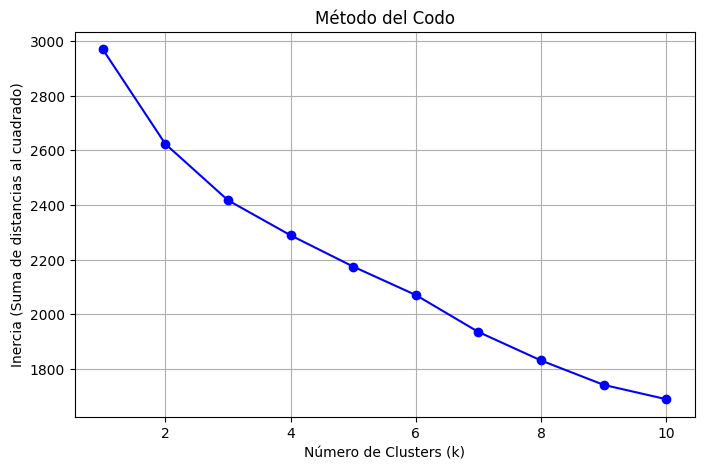

In [213]:
#Metodo del codo
inertia = []
K_range = range(1, 11)

for k in K_range:
    # n_init=10 para evitar malos resultados por inicialización aleatoria
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_model.fit(df_scaled)
    inertia.append(kmeans_model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia (Suma de distancias al cuadrado)')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

De esta forma obtenemos el k óptimo el cual es 3, aun así podríamos usar 2 también. Ahora procedemos a imprimir la gráfica para ver que clusters se nos han generado

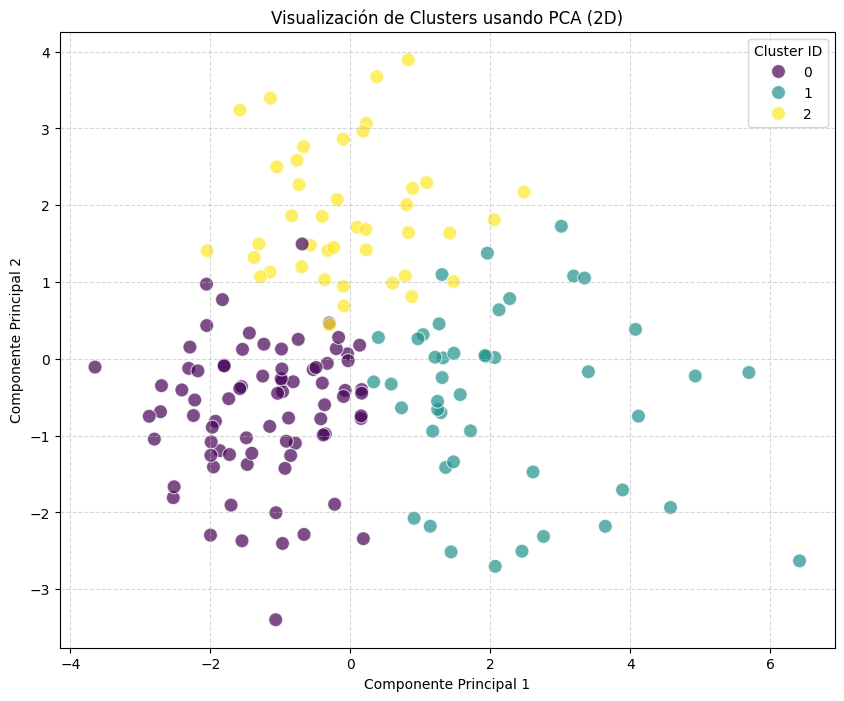

In [214]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_scaled)

# Usamos .copy() para no modificar el original accidentalmente
df_plot = df_merged_number3.copy()
df_plot['cluster_id'] = labels

# A. Calcular PCA sobre los datos ESCALADOS
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# B. Crear un DataFrame temporal para el gráfico
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['cluster_id'] = labels # Añadimos el color

# C. Graficar
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='cluster_id',
    data=df_pca,
    palette='viridis',
    s=100,      # Tamaño de los puntos
    alpha=0.7   # Transparencia
)
plt.title('Visualización de Clusters usando PCA (2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster ID')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [215]:
# Agrupamos y sacamos la media de variables clave
tmp = df_plot[['cluster_id','minutosEstancia', 'nMedsSum', 'acuity', 'num_diagnosticos','heartrate_max','resprate_max','resprate_min','sbp_max','dbp_max','pain_max']]
analisis = tmp.groupby('cluster_id').mean()

print(analisis)

            minutosEstancia   nMedsSum    acuity  num_diagnosticos  \
cluster_id                                                           
0                437.341772  12.544304  2.645570          2.873418   
1                387.333333  11.288889  2.111111          2.066667   
2                745.243902  24.292683  2.463415          2.268293   

            heartrate_max  resprate_max  resprate_min     sbp_max    dbp_max  \
cluster_id                                                                     
0               90.025316     18.531646     16.911392  145.278481  84.063291   
1              112.866667     23.600000     19.466667  134.600000  69.111111   
2               86.756098     19.439024     17.609756  156.731707  75.146341   

            pain_max  
cluster_id            
0           3.189873  
1           3.822222  
2           7.926829  


In [216]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Asumimos que tu DataFrame principal es df_merged_type3
df_reglas = df_merged_type3.copy()

df_items_rule = pd.DataFrame()

#Si llego en ambulancia true ,si vino caminando false
df_items_rule['ambulancia'] = (df_reglas['arrival_transport'] == 'AMBULANCE')
df_items_rule['disposition_flag'] = (df_reglas['disposition'] == 'ADMITTED')
df_items_rule['genero'] = (df_reglas['gender'] == 'M')
df_items_rule['tieneDolor'] = (df_reglas['Dolor']!='No Dolor')
df_items_rule['taquicardia'] = (df_reglas['Taquicardia']=='SI')
df_items_rule['taqiupnea'] = (df_reglas['Taqiupnea']== 'SI')
df_items_rule['Hipotermia'] = (df_reglas['Hipotermia']=='SI')
df_items_rule['Fiebre'] = (df_reglas['Fiebre']=='SI')
df_items_rule['tensionElevada'] = (df_reglas['SBP']!='Normal')
df_items_rule['tensionBajas'] = (df_reglas['DBP']!='Normal')
df_items_rule['estanciaLarga'] = (df_reglas['los'] > pd.to_timedelta(5, unit='h'))

print(df_items_rule)

     ambulancia  disposition_flag  genero  tieneDolor  taquicardia  taqiupnea  \
0         False              True   False        True         True       True   
1          True              True   False        True        False      False   
2          True             False   False       False        False      False   
3          True              True   False       False         True       True   
4          True              True   False       False         True       True   
..          ...               ...     ...         ...          ...        ...   
163        True              True    True       False         True       True   
164        True              True    True       False         True      False   
165        True              True    True        True         True       True   
166       False              True    True       False         True      False   
167       False             False    True        True         True      False   

     Hipotermia  Fiebre  te

Hacemos un estudio a priori con el support bajo 0.05

In [230]:
import warnings
# Esto ignora todas las DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 1. Encontrar ítems frecuentes
# Usamos un soporte bajo, ya que es la única combinación posible y queremos asegurarnos de capturarla
frequent_items = apriori(
    df_items_rule,
    min_support=0.05,
    use_colnames=True
)

print(frequent_items)

# 2. Generar todas las reglas de asociación
rules = association_rules(
    frequent_items,
    metric="confidence",
    min_threshold=0.7
)

print(rules)

Antecedentes = ['genero', 'ambulancia', 'tieneDolor', 'Fiebre', 'Hipotermia','tensionElevada','tensionBajas']

rules_limpias = rules[
    rules['antecedents'].apply(
        lambda x: x.issubset(set(Antecedentes))
    )
].copy()

Consecuentes = ['taquicardia','taqiupnea','estanciaLarga','disposition_flag']

rules_limpias = rules_limpias[
    rules_limpias['consequents'].apply(
        lambda x: x.issubset(set(Consecuentes))
    )
]

      support                                           itemsets
0    0.595238                                       (ambulancia)
1    0.654762                                 (disposition_flag)
2    0.434524                                           (genero)
3    0.601190                                       (tieneDolor)
4    0.386905                                      (taquicardia)
..        ...                                                ...
401  0.077381  (estanciaLarga, tensionBajas, genero, tieneDol...
402  0.053571  (estanciaLarga, genero, disposition_flag, taqu...
403  0.059524  (estanciaLarga, tensionBajas, tieneDolor, disp...
404  0.053571  (estanciaLarga, tensionBajas, genero, tieneDol...
405  0.053571  (estanciaLarga, genero, tieneDolor, ambulancia...

[406 rows x 2 columns]
                                           antecedents  \
0                                         (ambulancia)   
1                                             (Fiebre)   
2                     

In [231]:
rules_display = rules_limpias.copy()
rules_display['antecedents'] = rules_display['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_display['consequents'] = rules_display['consequents'].apply(lambda x: ', '.join(list(x)))

rules_display['Regla'] = rules_display['antecedents'] + '  →  ' + rules_display['consequents']

# 3. Filtrar por un Lift significativo para ignorar el ruido (ej. Lift >= 2)
rules_filtradas = rules_display[rules_display['lift'] >= 2]

# 4. Seleccionar las columnas que quieres mostrar
columnas_finales = [
    'Regla',
    'support',
    'confidence',
    'lift'
]

# Imprimir todas las reglas relevantes completas, fila por fila
for index, row in rules_filtradas.sort_values(by='lift', ascending=False).iterrows():
    # El :<80 significa que alinea a la izquierda y rellena hasta 80 espacios
    print(f"Regla: {row['Regla']:<80} | Lift: {row['lift']:.4f}")

Regla: Fiebre, genero, tieneDolor  →  disposition_flag, taquicardia                     | Lift: 2.7451
Regla: tensionElevada, Fiebre, genero, tieneDolor  →  disposition_flag, taquicardia     | Lift: 2.6952
Regla: tieneDolor, Fiebre  →  disposition_flag, taquicardia                             | Lift: 2.6765
Regla: Fiebre  →  disposition_flag, taquicardia                                         | Lift: 2.6667
Regla: Fiebre, tensionElevada, tieneDolor  →  disposition_flag, taquicardia             | Lift: 2.6353
Regla: genero, Fiebre  →  disposition_flag, taquicardia                                 | Lift: 2.6353
Regla: tensionElevada, Fiebre  →  disposition_flag, taquicardia                         | Lift: 2.6006
Regla: tensionElevada, genero, Fiebre  →  disposition_flag, taquicardia                 | Lift: 2.5882
Regla: genero, Fiebre, ambulancia  →  disposition_flag, taquicardia                     | Lift: 2.4706
Regla: tensionElevada, genero, Fiebre, ambulancia  →  disposition_flag, t

Hacemos un estudio con el min_support alto 0.1

In [234]:
# 1. Encontrar ítems frecuentes
# Usamos un soporte bajo, ya que es la única combinación posible y queremos asegurarnos de capturarla
frequent_items = apriori(
    df_items_rule,
    min_support=0.1,
    use_colnames=True
)

print(frequent_items)

# 2. Generar todas las reglas de asociación
rules = association_rules(
    frequent_items,
    metric="confidence",
    min_threshold=0.7
)

print(rules)

Antecedentes = ['genero', 'ambulancia', 'tieneDolor', 'Fiebre', 'Hipotermia','tensionElevada','tensionBajas']

rules_limpias = rules[
    rules['antecedents'].apply(
        lambda x: x.issubset(set(Antecedentes))
    )
].copy()

Consecuentes = ['taquicardia','taqiupnea','estanciaLarga','disposition_flag']

rules_limpias = rules_limpias[
    rules_limpias['consequents'].apply(
        lambda x: x.issubset(set(Consecuentes))
    )
]

      support                                           itemsets
0    0.595238                                       (ambulancia)
1    0.654762                                 (disposition_flag)
2    0.434524                                           (genero)
3    0.601190                                       (tieneDolor)
4    0.386905                                      (taquicardia)
..        ...                                                ...
188  0.113095  (estanciaLarga, genero, disposition_flag, taqu...
189  0.125000  (estanciaLarga, tieneDolor, disposition_flag, ...
190  0.136905  (estanciaLarga, tensionBajas, tieneDolor, disp...
191  0.101190  (estanciaLarga, genero, tieneDolor, taquicardi...
192  0.107143  (estanciaLarga, tensionBajas, genero, tieneDol...

[193 rows x 2 columns]
                                           antecedents  \
0                                         (ambulancia)   
1                                         (ambulancia)   
2                     

In [235]:
rules_display = rules_limpias.copy()
rules_display['antecedents'] = rules_display['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_display['consequents'] = rules_display['consequents'].apply(lambda x: ', '.join(list(x)))

rules_display['Regla'] = rules_display['antecedents'] + '  →  ' + rules_display['consequents']

# 3. Filtrar por un Lift significativo para ignorar el ruido (ej. Lift >= 2)
rules_filtradas = rules_display[rules_display['lift'] >= 2]

# 4. Seleccionar las columnas que quieres mostrar
columnas_finales = [
    'Regla',
    'support',
    'confidence',
    'lift'
]

# Imprimir todas las reglas relevantes completas, fila por fila
for index, row in rules_filtradas.sort_values(by='lift', ascending=False).iterrows():
    # El :<80 significa que alinea a la izquierda y rellena hasta 80 espacios
    print(f"Regla: {row['Regla']:<80} | Lift: {row['lift']:.4f}")

Regla: Fiebre  →  disposition_flag, taquicardia                                         | Lift: 2.6667
Regla: Fiebre  →  taquicardia                                                           | Lift: 2.0923


El siguiente bloque de código genera la gráfica de distancia al vecino más cercano (k-distance graph), utilizada para elegir el parámetro eps en DBSCAN. Esta visualización ayuda a identificar el punto óptimo donde las distancias aumentan bruscamente, señalando la frontera entre clusters y outliers.

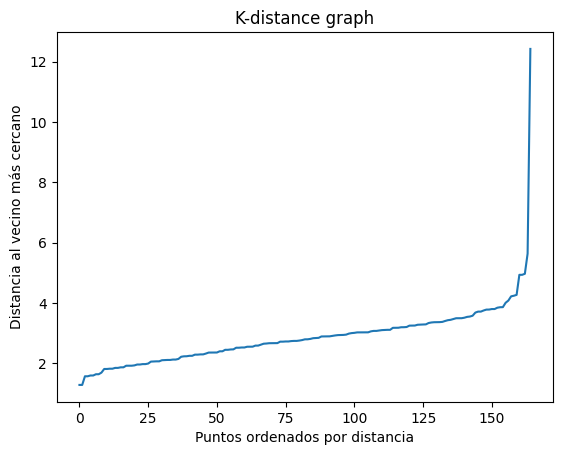

In [221]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Calcular distancias al vecino más cercano usando los datos escalados
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

# Ordenar distancias y graficar el k-distance
distances = np.sort(distances[:,1], axis=0)
plt.plot(distances)
plt.xlabel('Puntos ordenados por distancia')
plt.ylabel('Distancia al vecino más cercano')
plt.title('K-distance graph')
plt.show()

Al analizar la curva, el cambio abrupto indica el valor de eps recomendado para DBSCAN, que en este caso es aproximadamente 4.

In [222]:
from sklearn.cluster import DBSCAN

# Ajustar DBSCAN con los parámetros seleccionados
dbscan = DBSCAN(eps=2, min_samples=2)
df_scaled_DBSCAN = df_scaled.drop(columns=['gender','race', 'arrival_transport','acuity']).copy()
labels_dbscan = dbscan.fit_predict(df_scaled_DBSCAN)

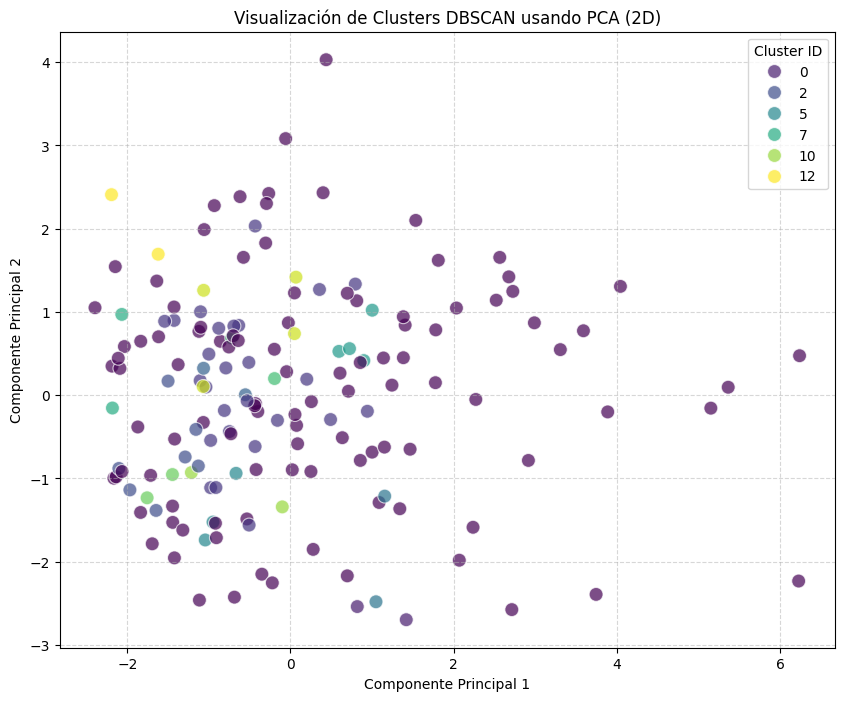

In [223]:
# Reducción de dimensiones con PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled_DBSCAN)

# DataFrame para la visualización
#dfpca_dbscan = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

df_scaled_DBSCAN['PC1'] = principal_components[:, 0]
df_scaled_DBSCAN['PC2'] = principal_components[:, 1]
df_scaled_DBSCAN['clusterid'] = labels_dbscan  # Etiquetas de DBSCAN

# Crear la gráfica con leyenda y formato similar
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='clusterid',
    data=df_scaled_DBSCAN,
    palette='viridis',
    s=100,
    alpha=0.7
)
plt.title('Visualización de Clusters DBSCAN usando PCA (2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster ID')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



La gráfica de K-means muestra tres clusters bien delimitados, ya que el algoritmo obliga a todos los puntos a pertenecer a algún grupo, aunque la estructura sea poco natural. Por el contrario, DBSCAN aglutina la mayor parte de los datos, mientras los puntos marcados como ruido (-1) muestran mayor dispersión, que son aquellos datos atípicos o excepcionales conocidos como outliers.